## Challenge: what test to use
Use the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html) to address the following questions. The same participants answered questions in 2012 and again in 2014.

[Raw data](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv)

[Variable coding and content](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
df = pd.read_csv(path)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample

In [14]:
print(df['cntry'].value_counts())

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64


In [109]:
def ess_hist(self):
    g = sns.FacetGrid(data=df,
                      row='year',
                      col='cntry',
                      margin_titles=True,
                      dropna=True,
                      sharey=False)

    g.map(plt.hist, self)
    plt.show()

def ess_normaltest(self):
    for cntry in df['cntry'].unique():
        x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), self]
        y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), self]
        print('normal test {}'.format(cntry))
        print('2012: {}'.format(stats.normaltest(x, nan_policy='omit')))
        print('2014: {}'.format(stats.normaltest(y, nan_policy='omit')))

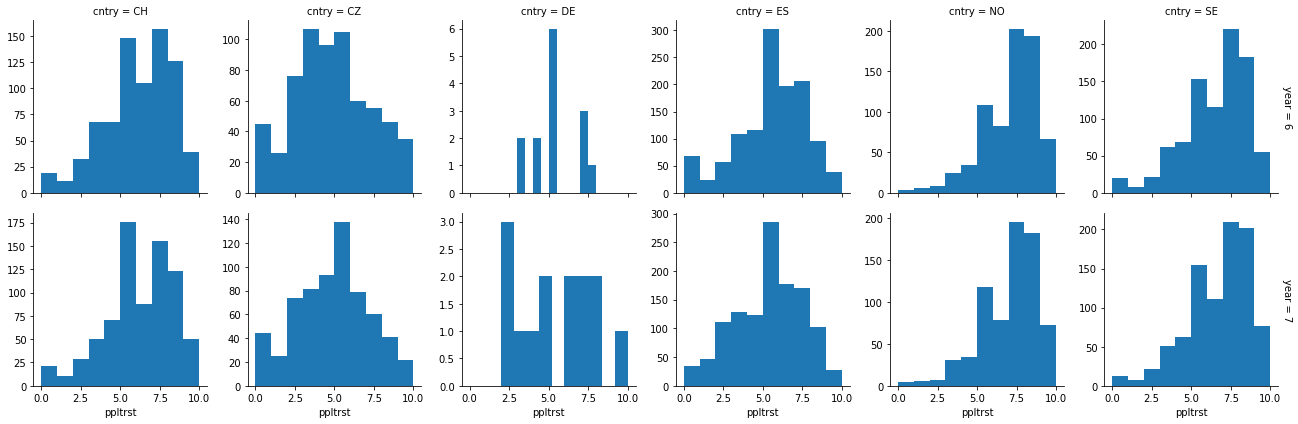

In [110]:
ess_hist('ppltrst')

In [125]:
ess_normaltest('ppltrst')

normal test CH
2012: NormaltestResult(statistic=34.41403485540727, pvalue=3.365792056559453e-08)
2014: NormaltestResult(statistic=32.07122389622901, pvalue=1.0859809748932778e-07)
normal test CZ
2012: NormaltestResult(statistic=25.049370820773337, pvalue=3.6357853778444874e-06)
2014: NormaltestResult(statistic=8.015640651166011, pvalue=0.0181729632415102)
normal test DE
2012: NormaltestResult(statistic=0.5537028123495471, pvalue=0.7581671476973477)
2014: NormaltestResult(statistic=0.6451892229565249, pvalue=0.7242674045554323)
normal test ES
2012: NormaltestResult(statistic=48.02764152552339, pvalue=3.7233182008430934e-11)
2014: NormaltestResult(statistic=29.796593978669407, pvalue=3.3865058313913864e-07)
normal test NO
2012: NormaltestResult(statistic=85.4862970000314, pvalue=2.7345537691839186e-19)
2014: NormaltestResult(statistic=71.2109329693447, pvalue=3.441457258129768e-16)
normal test SE
2012: NormaltestResult(statistic=72.6342910118729, pvalue=1.6891340175735596e-16)
2014: Norm

In [126]:
# non-normal distributions (except DE but small sample size...)
# use wilcoxon ranked for a/b where participants did both versions
for cntry in df['cntry'].unique():
    x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), 'ppltrst']
    y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), 'ppltrst']
    result = stats.wilcoxon(x,y)
    print('\nTrust results for {}'.format(cntry))
    print('Mean 2012: {}'.format(np.mean(x)))
    print('Mean 2014: {}'.format(np.mean(y)))
    print(result)
    if cntry == 'DE':
        print(stats.ttest_rel(x, y, nan_policy='omit'))


Trust results for CH
Mean 2012: 5.677878395860285
Mean 2014: 5.751617076326003
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

Trust results for CZ
Mean 2012: 4.362519201228879
Mean 2014: 4.424657534246576
WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

Trust results for DE
Mean 2012: 5.214285714285714
Mean 2014: 5.357142857142857
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

Trust results for ES
Mean 2012: 5.114591920857379
Mean 2014: 4.895127993393889
WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

Trust results for NO
Mean 2012: 6.64931506849315
Mean 2014: 6.598630136986301
WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

Trust results for SE
Mean 2012: 6.058498896247241
Mean 2014: 6.257709251101321
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


**Results**: given the range of answers 0-10 of H values between ~82xxx and ~243xxxx
- Significant change
    - ES (Spain): significant decrease in trust, mean went down about .2
    - SE (Sweden): significant increase in trust, mean went up about .2


- No significant change
    - CH (Switzerland): non significant pval = .44
    - CZ (Czech Republic): non significant pval = .29
    - DE (Denmark):  non significant pval = .91, .85
    - NO (Norway): non significant pval = .61

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample

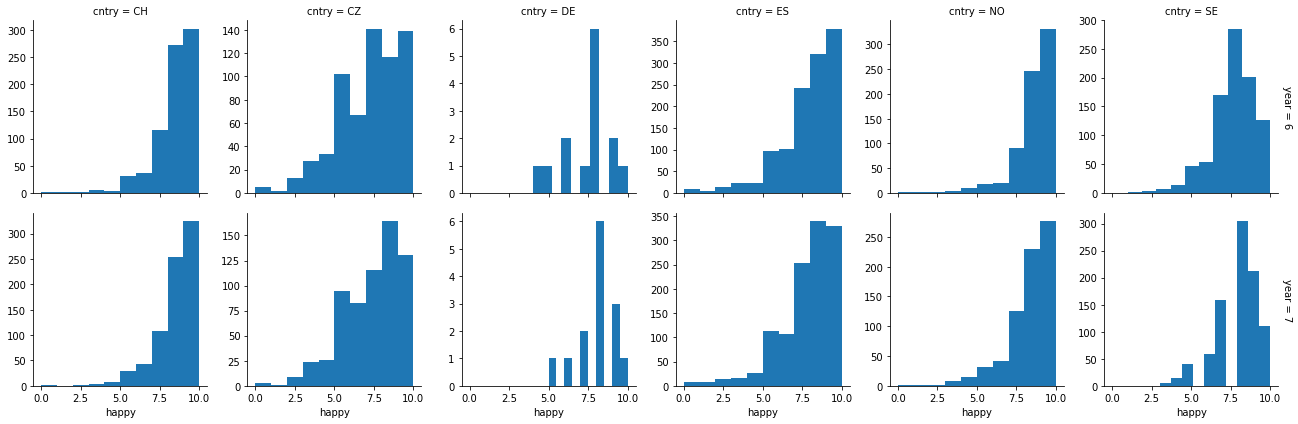

In [115]:
ess_hist('happy')

In [127]:
ess_normaltest('happy')

normal test CH
2012: NormaltestResult(statistic=188.44583258657116, pvalue=1.2009014936632828e-41)
2014: NormaltestResult(statistic=156.83716655039797, pvalue=8.774896545471838e-35)
normal test CZ
2012: NormaltestResult(statistic=33.31170486577394, pvalue=5.840569510842764e-08)
2014: NormaltestResult(statistic=41.51459060672008, pvalue=9.665430236613688e-10)
normal test DE
2012: NormaltestResult(statistic=1.506462655423323, pvalue=0.4708426450576315)
2014: NormaltestResult(statistic=2.1782905366822414, pvalue=0.33650399143734494)
normal test ES
2012: NormaltestResult(statistic=211.81535847203477, pvalue=1.0112983918145527e-46)
2014: NormaltestResult(statistic=196.39100576911136, pvalue=2.260658435940068e-43)
normal test NO
2012: NormaltestResult(statistic=228.52086537729167, pvalue=2.38410063518236e-50)
2014: NormaltestResult(statistic=182.17416218051966, pvalue=2.7630154274213406e-40)
normal test SE
2012: NormaltestResult(statistic=142.6192698491184, pvalue=1.0730477437761676e-31)
201

In [128]:
# non normal dists so non parametric
# wilcoxon signed-rank for a/b test where participants did both versions
for cntry in df['cntry'].unique():
    x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), 'happy']
    y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), 'happy']
    result = stats.wilcoxon(x, y)
    print('\nHappy results for {}'.format(cntry))
    print('Mean 2012: {}'.format(np.mean(x)))
    print('Mean 2014: {}'.format(np.mean(y)))
    print(result)
    if cntry == 'DE':
        print(stats.ttest_rel(x, y, nan_policy='omit'))


Happy results for CH
Mean 2012: 8.088311688311688
Mean 2014: 8.116429495472186
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

Happy results for CZ
Mean 2012: 6.7708978328173375
Mean 2014: 6.914110429447852
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

Happy results for DE
Mean 2012: 7.428571428571429
Mean 2014: 7.857142857142857
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

Happy results for ES
Mean 2012: 7.548679867986799
Mean 2014: 7.41996699669967
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

Happy results for NO
Mean 2012: 8.25171939477304
Mean 2014: 7.9151846785225715
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

Happy results for SE
Mean 2012: 7.907386990077177
Mean 2014: 7.946961325966851
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


**Results**: given the range of answers 0-10 of H values between 23.5 and ~23xxxx
- Significant change
    - CZ (Czech Republic): significant increase in happiness, mean is up .2 p val .01


- Borderline
    - ES (Spain): pval is .49 so technically this could be interpreted as a significant decrease in happiness (mean down ~ .13)


- No significant change
    - CH (Switzerland): non significant pval = .44
    - DE (Denmark):  non significant pval = .91, .85
    - NO (Norway): non significant pval = .61
    - SE (Sweden): non significant pval = .51

## 3. Who reported watching more TV in 2012, men or women?

In [169]:
print(len(df.loc[(df['year'] == 6) & (df['gndr'] == 1), 'tvtot']))
print(len(df.loc[(df['year'] == 6) & (df['gndr'] == 2), 'tvtot']))

2154
2143


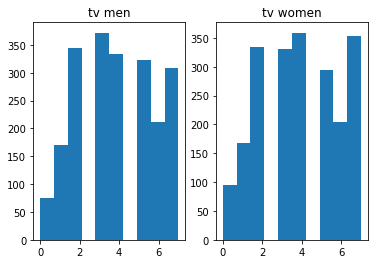

NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=806684.0, pvalue=0.326468829637812)


In [167]:
tv_women_2012 = df.loc[(df['year'] == 6) & (df['gndr'] == 2), 'tvtot']
tv_men_2012 = df.loc[
    (df['year'] == 6) & (df['gndr'] == 1), 'tvtot'
].sample(len(tv_women_2012))

plt.subplot(1,2,1)
plt.hist(tv_men_2012.dropna())
plt.title('tv men')
         
plt.subplot(1,2,2)
plt.hist(tv_women_2012.dropna())
plt.title('tv women')
plt.show()

print(stats.normaltest(tv_men_2012))
print(stats.normaltest(tv_women_2012))
print(stats.wilcoxon(tv_men_2012, tv_women_2012))

**Result**: with a pval of .326 we can't confidently conclude there was a significant difference in the amount of tv men and women watched in 2012

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [ ]:
# 1 live w partner 2 live alone